In [2]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt

from qiskit import Aer
from tqdm.notebook import tqdm
from sklearn.datasets import load_iris

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Iris Data

## Data Preparation

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

### Only first two classes

In [5]:
x = x[y != 2]
y = y[y != 2].reshape(-1,1)
print(x.shape, y.shape)

(100, 4) (100, 1)


### Normalize Input Data

In [6]:
x = x - np.amin(x, axis = 0)
x = x/np.max(x, axis = 0)
x = np.pi*x

## Train Model

In [7]:
backend = Aer.get_backend('qasm_simulator')

In [14]:
np.random.seed(42)
network1 = sequential_qnn(q_bits = [4, 2],
                         dim = [4, 2, 1],
                         reps = 1,
                         backend = backend,
                         shots = 10000,
                         lr = 0.1)

In [15]:
network1.train(x,y, epochs = 100, verbose = True)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.5788790835000001
epoch: 1, loss: 0.4805341947999999
epoch: 2, loss: 0.36734657559999995
epoch: 3, loss: 0.24142560069999994
epoch: 4, loss: 0.1448321174
epoch: 5, loss: 0.09726094109999998
epoch: 6, loss: 0.08667548360000003
epoch: 7, loss: 0.08514999210000002
epoch: 8, loss: 0.0804845379
epoch: 9, loss: 0.0678246025
epoch: 10, loss: 0.053489795900000005
epoch: 11, loss: 0.0440829248
epoch: 12, loss: 0.040439301100000005
epoch: 13, loss: 0.04105677399999999
epoch: 14, loss: 0.04237602509999999
epoch: 15, loss: 0.04286654769999999
epoch: 16, loss: 0.039595537199999996
epoch: 17, loss: 0.03445564269999999
epoch: 18, loss: 0.0288372589
epoch: 19, loss: 0.0249826926
epoch: 20, loss: 0.02168046250000001
epoch: 21, loss: 0.020443570799999998
epoch: 22, loss: 0.0194516836
epoch: 23, loss: 0.019663131200000003
epoch: 24, loss: 0.019789652499999998
epoch: 25, loss: 0.020639381000000002
epoch: 26, loss: 0.0207310339
epoch: 27, loss: 0.0200557313
epoch: 28, loss: 0.0178224285
ep

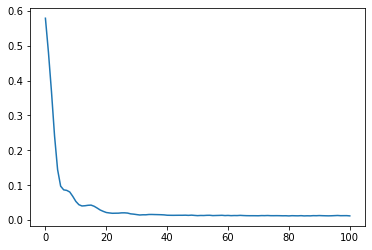

In [16]:
plt.plot(network1.loss)

In [8]:
#saver(network1, data_path("Iris_qnn1"))
network1 = loader(data_path("Iris_qnn1"))

In [9]:
np.random.seed(40)
network2 = sequential_dnn(dim=[4, 2, 1], bias=False, lr=0.1)

In [10]:
network2.train(x,y, epochs = 100, verbose = True)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.30929178919588485
epoch: 1, loss: 0.28878133677447804
epoch: 2, loss: 0.27193748507053106
epoch: 3, loss: 0.2575688549974009
epoch: 4, loss: 0.24399934167430135
epoch: 5, loss: 0.23086094820509165
epoch: 6, loss: 0.21843641555269414
epoch: 7, loss: 0.20697538124246478
epoch: 8, loss: 0.19658291336608857
epoch: 9, loss: 0.1872916687330534
epoch: 10, loss: 0.17909677373015584
epoch: 11, loss: 0.17192687068537565
epoch: 12, loss: 0.1656305139373356
epoch: 13, loss: 0.16000796067266576
epoch: 14, loss: 0.1548588669913979
epoch: 15, loss: 0.15001157433125056
epoch: 16, loss: 0.14532526571944218
epoch: 17, loss: 0.14067570141853106
epoch: 18, loss: 0.13593807866574617
epoch: 19, loss: 0.13097590067852985
epoch: 20, loss: 0.12564075962182764
epoch: 21, loss: 0.1197860771615617
epoch: 22, loss: 0.11329610417498062
epoch: 23, loss: 0.10612706318169768
epoch: 24, loss: 0.09834816242969781
epoch: 25, loss: 0.09015940320732442
epoch: 26, loss: 0.08186371597208279
epoch: 27, loss:

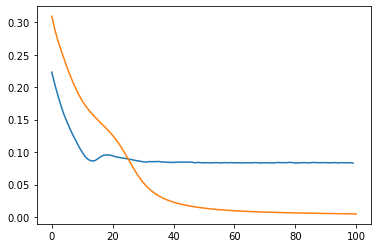

In [16]:
network1 = loader(data_path("Iris_qnn1"))
plt.plot(network1.loss)
plt.plot(network2.loss)
plt.show()

y_pred = np.round(network2.predict(x)).astype(int)

In [17]:
print(y_pred.flatten())
print(y.flatten())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
print(np.mean(y_pred == y))

1.0
